In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import time
import ast
import matplotlib.pyplot as plt
import cv2

In [2]:

size = 128
num_labels = 7

df = pd.read_csv("ClassificationData2.csv")[["path", "labels", 'class']]
df

,path,labels,class
0,./Project/XN_Project/renders/intraventricular/...,"[1, 0, 0, 1, 0, 0]",1
1,./Project/XN_Project/renders/intraventricular/...,"[1, 0, 0, 1, 0, 0]",1
2,./Project/XN_Project/renders/intraventricular/...,"[1, 0, 0, 1, 0, 0]",1
3,./Project/XN_Project/renders/intraventricular/...,"[1, 0, 0, 1, 0, 0]",1
4,./Project/XN_Project/renders/intraventricular/...,"[1, 0, 0, 1, 0, 0]",1
...,...,...,...
11382,./Project/XN_Project/renders/normal/normal/bra...,"[0, 0, 0, 0, 0, 0]",0
11383,./Project/XN_Project/renders/normal/normal/max...,"[0, 0, 0, 0, 0, 0]",0
11384,./Project/XN_Project/renders/normal/normal/bra...,"[0, 0, 0, 0, 0, 0]",0
11385,./Project/XN_Project/renders/normal/normal/bra...,"[0, 0, 0, 0, 0, 0]",0


In [3]:
images = np.array(df['path'])
print(images.shape)

(11387,)


In [4]:
# Select random datapoints
image_paths = np.random.choice(images, size=11387, replace=False)
image_paths.shape

(11387,)

In [5]:
data = []
labels = []
start = time.time()
for path in image_paths:  
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (size, size))
#     img = np.array(img)
    if(img.shape == (size,size)):
        data.append(np.array(img))

        s = df[df['path'] == path]['class'].iat[0]
        labels.append(s)

end = time.time()
print(end - start)
data, labels = np.array(data), np.array(labels)
print(data.shape, labels.shape)

82.07313227653503
(11387, 128, 128) (11387,)


In [6]:
from sklearn.model_selection import train_test_split 
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(data,labels, 
                                   random_state=104,  
                                   test_size=0.2,  
                                   shuffle=True) 

# X_test, X_CV, y_test, y_CV = train_test_split(X_test,y_test, 
#                                    random_state=104,  
#                                    test_size=0.5,  
#                                    shuffle=True) 


# ## Normalize training data to be between 0 and 1, we have to typecast it as a float to do so.
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_CV = X_CV.astype('float32')
# X_train /= 255.
# X_test /= 255.
# X_CV /= 255

# # Reshape data
# X_train = X_train.reshape(-1,size,size, 3)
# X_test = X_test.reshape(-1,size,size, 3)
# X_CV = X_CV.reshape(-1,size,size, 3)

print("80:10:10 split for train/test/CV")
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
# print('X_CV:', X_CV.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
# print('y_CV:', y_CV.shape)

80:10:10 split for train/test/CV
X_train: (9109, 128, 128)
X_test: (2278, 128, 128)
y_train: (9109,)
y_test: (2278,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter=12000), verbose=True)
pipe.fit(X_train.reshape((-1, size*size)), y_train)
pipe.score(X_test.reshape((-1, size*size)), y_test)

[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   4.2s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=17.4min


0.5158033362598771

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
y_predict = pipe.predict(X_test.reshape(-1,size*size))

conf_mx = confusion_matrix(y_test, y_predict)
conf_mx

array([[842, 161,  35,  32,  36,  70,  36],
       [135, 283,   9,   9,  14,  25,  11],
       [ 49,  22,  17,   3,   2,   6,   5],
       [ 44,  17,   5,   7,   8,   8,   3],
       [ 54,  18,   2,   2,   6,   8,   3],
       [ 97,  33,   8,   9,   8,  18,  14],
       [ 52,  27,   1,   4,   6,  12,   2]], dtype=int64)

<AxesSubplot:>

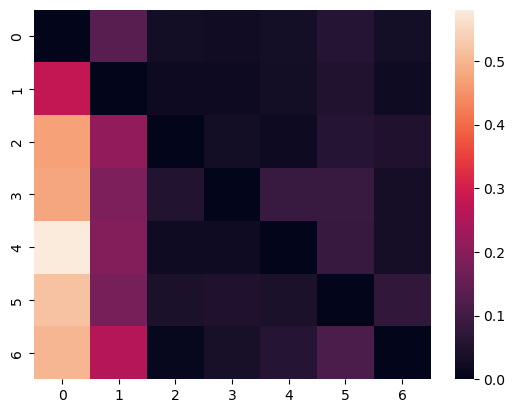

In [10]:
import seaborn as sns
row_sum = conf_mx.sum(axis=1, keepdims=True)
nconf_mx = conf_mx/row_sum
np.fill_diagonal(nconf_mx,0)

sns.heatmap(nconf_mx)

(array([1212.,  486.,  104.,   92.,   93.,  187.,  104.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

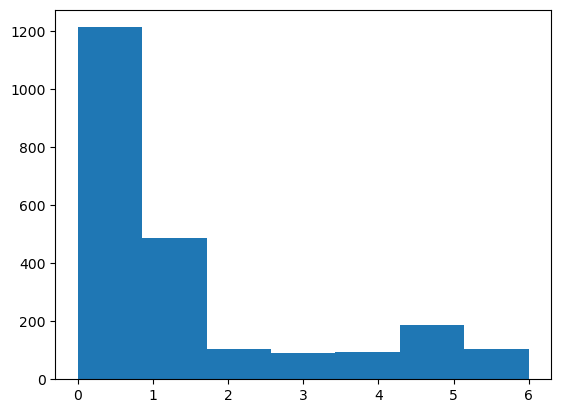

In [11]:
plt.hist(y_test, 7)